## Title: Predicting Arrests in Police Traffic Stops Using Logistic Regression

### Problem Statement
This project aims to predict whether a driver will be arrested during a traffic stop based on features like gender, race, violation type, and stop duration. The goal is to identify factors that influence arrest decisions and evaluate the model's performance.

### Objective
Build a **Logistic Regression** model to predict arrests based on the preprocessed dataset. Evaluate the model using standard metrics to assess its predictive accuracy.

### Key Steps

1. **Loading Preprocessed Data**:
   - Loaded the preprocessed dataset (`cleaned_traffic_data.csv`), which has been cleaned and encoded during the preprocessing stage.

2. **Feature and Target Selection**:
   - Defined **X** (features) and **y** (target variable: `is_arrested`).
   - Split the data into training and testing sets.

3. **Model Training**:
   - Trained a **Logistic Regression** model using the training data.

4. **Model Evaluation**:
   - Evaluated the model using:
     - **Confusion Matrix**
     - **Classification Report** (Precision, Recall, F1-score)
     - **Accuracy Score**


In [172]:
# Import necessary libraries
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [173]:
# Load cleaned data
df = pd.read_csv("cleaned_traffic_data.csv")

In [174]:
df

,driver_gender,search_conducted,is_arrested,stop_duration,drugs_related_stop,driver_race_Black,driver_race_Hispanic,driver_race_Other,driver_race_White,violation_Moving violation,violation_Other,violation_Registration/plates,violation_Seat belt,violation_Speeding
0,0,0,False,1.0,0,False,False,False,True,False,False,False,False,True
1,0,0,False,1.0,0,False,False,False,True,False,False,False,False,True
2,0,0,False,1.0,0,False,False,False,True,False,False,False,False,True
3,0,0,True,2.0,0,False,False,False,True,False,True,False,False,False
4,1,0,False,1.0,0,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61469,0,0,False,1.0,0,False,False,False,True,False,False,False,False,True
61470,1,0,False,1.0,0,False,False,False,True,False,False,False,False,True
61471,0,0,False,1.0,0,False,False,False,True,False,False,False,False,True
61472,0,0,False,1.0,0,True,False,False,False,False,False,False,False,False


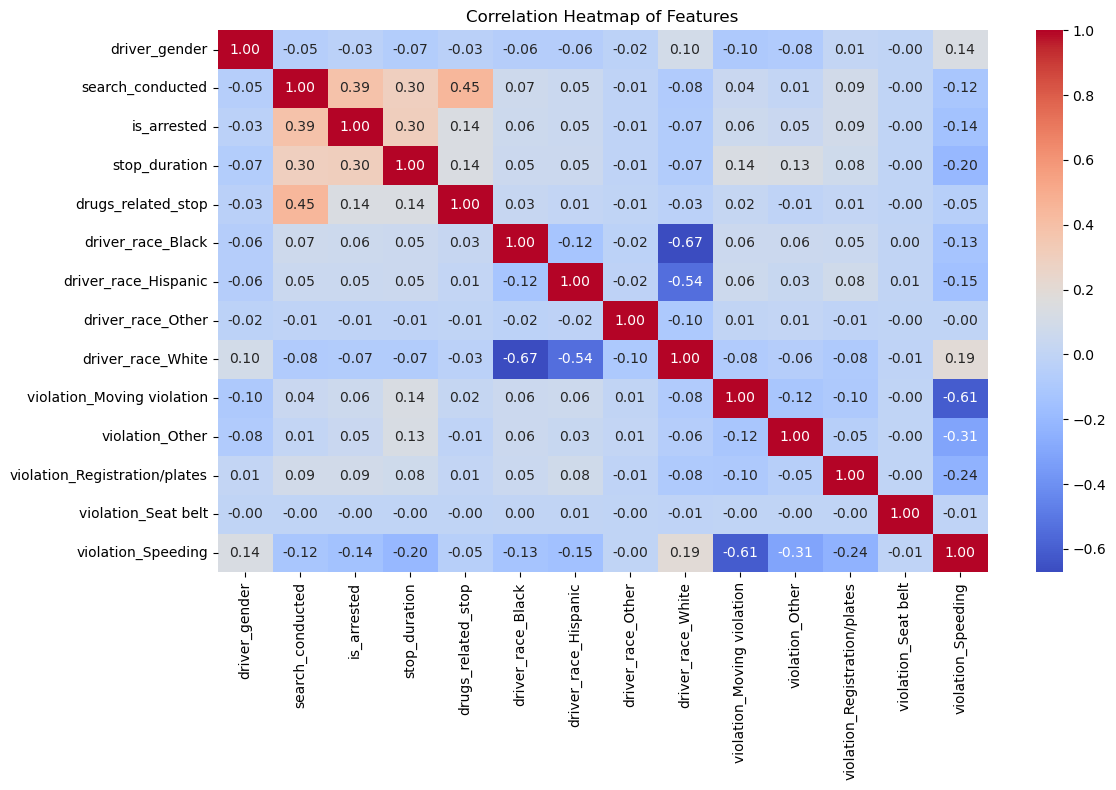

In [175]:
# Quick correlation heatmap to visualize feature relationships
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.tight_layout()
plt.show()

In [176]:
df.isnull().sum()

driver_gender                    0
search_conducted                 0
is_arrested                      0
stop_duration                    1
drugs_related_stop               0
driver_race_Black                0
driver_race_Hispanic             0
driver_race_Other                0
driver_race_White                0
violation_Moving violation       0
violation_Other                  0
violation_Registration/plates    0
violation_Seat belt              0
violation_Speeding               0
dtype: int64

In [177]:
# Impute missing value in 'stop_duration' with the mode (most frequent value)
mode_value = df['stop_duration'].mode()[0]
df['stop_duration'] = df['stop_duration'].fillna(mode_value)


In [178]:
# Define features and target
X = df.drop('is_arrested', axis=1)
y = df['is_arrested']

In [179]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=777)

In [180]:
# Check rows where stop_duration is null
df[df['stop_duration'].isnull()]


,driver_gender,search_conducted,is_arrested,stop_duration,drugs_related_stop,driver_race_Black,driver_race_Hispanic,driver_race_Other,driver_race_White,violation_Moving violation,violation_Other,violation_Registration/plates,violation_Seat belt,violation_Speeding


In [181]:
# Initialize and train logistic regression model
log_reg = LogisticRegression(max_iter=1000,class_weight="balanced")
log_reg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [182]:
# Predict and evaluate
y_pred = log_reg.predict(X_test)

In [183]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[15322  2417]
 [  169   535]]

Classification Report:
               precision    recall  f1-score   support

       False       0.99      0.86      0.92     17739
        True       0.18      0.76      0.29       704

    accuracy                           0.86     18443
   macro avg       0.59      0.81      0.61     18443
weighted avg       0.96      0.86      0.90     18443


Accuracy Score: 0.8597841999674674


In [184]:
# Step 2: SMOTE Resampling
smote = SMOTE(random_state=777)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [185]:
# Logistic Regression after SMOTE
logreg_model_smote = LogisticRegression(max_iter=1000, class_weight='balanced')
logreg_model_smote.fit(X_train_res, y_train_res)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [186]:
# Predictions for Logistic Regression with SMOTE
y_pred_logreg_smote = logreg_model_smote.predict(X_test)

In [ ]:
# Evaluation for Logistic Regression with SMOTE
print("\nLogistic Regression (with SMOTE) Performance:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg_smote))
print("\nClassification Report:\n", classification_report(y_test, y_pred_logreg_smote))
print("Accuracy Score:", accuracy_score(y_test, y_pred_logreg_smote))


Logistic Regression (with SMOTE) Performance:
Confusion Matrix:
 [[15357  2382]
 [  176   528]]

Classification Report:
               precision    recall  f1-score   support

       False       0.99      0.87      0.92     17739
        True       0.18      0.75      0.29       704

    accuracy                           0.86     18443
   macro avg       0.59      0.81      0.61     18443
weighted avg       0.96      0.86      0.90     18443

Accuracy Score: 0.8613023911511143


In [ ]:
# Step 3: Random Forest Classifier
rf_model = RandomForestClassifier(random_state=777, class_weight='balanced')
rf_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(class_weight='balanced', random_state=777)

In [ ]:
# Predictions for Random Forest
y_pred_rf = rf_model.predict(X_test)

In [ ]:
# Evaluation for Random Forest
print("\nRandom Forest Classifier Performance:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("Accuracy Score:", accuracy_score(y_test, y_pred_rf))


Random Forest Classifier Performance:
Confusion Matrix:
 [[15277  2462]
 [  182   522]]

Classification Report:
               precision    recall  f1-score   support

       False       0.99      0.86      0.92     17739
        True       0.17      0.74      0.28       704

    accuracy                           0.86     18443
   macro avg       0.58      0.80      0.60     18443
weighted avg       0.96      0.86      0.90     18443

Accuracy Score: 0.8566393753727701


In [ ]:
# Hyperparameter Tuning for Logistic Regression using GridSearchCV
param_grid_log_reg = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2'],
}
grid_search_log_reg = GridSearchCV(log_reg, param_grid_log_reg, cv=5)
grid_search_log_reg.fit(X_train_res, y_train_res)
print("Best Hyperparameters for Logistic Regression:", grid_search_log_reg.best_params_)

Best Hyperparameters for Logistic Regression: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


In [194]:
# Re-evaluate models with best hyperparameters
best_log_reg = grid_search_log_reg.best_estimator_


In [195]:
# Logistic Regression with best hyperparameters
y_pred_log_reg_best = best_log_reg.predict(X_test)
print("Logistic Regression (with best hyperparameters) Performance:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg_best))
print("Classification Report:")
print(classification_report(y_test, y_pred_log_reg_best))
print("Accuracy Score:", accuracy_score(y_test, y_pred_log_reg_best))

Logistic Regression (with best hyperparameters) Performance:
Confusion Matrix:
[[15357  2382]
 [  176   528]]
Classification Report:
              precision    recall  f1-score   support

       False       0.99      0.87      0.92     17739
        True       0.18      0.75      0.29       704

    accuracy                           0.86     18443
   macro avg       0.59      0.81      0.61     18443
weighted avg       0.96      0.86      0.90     18443

Accuracy Score: 0.8613023911511143
